In [ ]:
#import all libraries and packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [ ]:
#load the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#check the shape
x_train.shape

(60000, 28, 28)

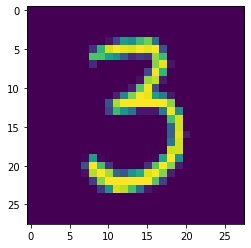

In [ ]:
#plotting the image
plt.imshow(x_train[50])
plt.show()

In [ ]:
#checking the shape of y_train
y_train.shape

(60000,)

In [ ]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#flattening of our matrix to a vector of input_shape 784
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
#flattening of our test_data
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[5]

2

In [ ]:
#converting into a one hot encoding form
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Normalization of x_train and x_test
x_train=x_train/255
x_test=x_test/255

In [ ]:
# defining the type of model
model=Sequential()

In [ ]:
#building the model
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#getting the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                90        
Total params: 53,074
Trainable params: 53,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model by giving loss function and optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# train the data
history=model.fit(x_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 1.3629 - accuracy: 0.4973
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9231
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1924 - accuracy: 0.9459
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9568
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9645
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9707
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9735
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9778
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9777
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9807

In [ ]:
#evaluating the model using test
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9687


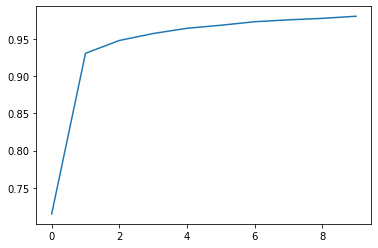

In [ ]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
# predicting values
predicted_values=model.predict(x_test[:10])
print(predicted_values)

[[1.89878353e-08 9.03189079e-10 1.01555896e-04 4.91237442e-05
  1.11062910e-07 2.04604675e-07 1.57723891e-20 9.99837160e-01
  4.43639010e-07 1.13749729e-05]
 [3.68677092e-07 6.59921673e-09 9.97948110e-01 1.99059444e-03
  3.52766167e-12 9.37748700e-06 3.19396918e-08 4.61979454e-07
  5.11799371e-05 2.48536836e-09]
 [3.77879275e-07 9.95246232e-01 1.37294519e-05 6.38004421e-05
  1.99394053e-05 7.18809133e-06 8.87113638e-05 3.86681844e-04
  3.35605326e-03 8.17236491e-04]
 [9.99934793e-01 1.51679728e-11 3.67240973e-05 2.29567076e-09
  1.30648787e-05 1.99119683e-07 7.44772919e-08 8.89577041e-06
  4.47841586e-07 5.74093428e-06]
 [6.54906580e-06 1.29338531e-07 5.66697578e-10 6.22064454e-06
  9.97563004e-01 1.62010110e-05 4.68970807e-10 1.44485703e-05
  7.27444956e-07 2.39278260e-03]
 [4.97048291e-10 9.99872923e-01 5.59113245e-09 9.84266464e-08
  1.55392726e-07 5.15061593e-09 2.62432508e-07 1.74234719e-05
  4.32207962e-05 6.58540812e-05]
 [3.70301450e-07 7.29477634e-08 8.03036283e-12 2.18655444e

In [ ]:
print(np.argmax(predicted_values,axis=1))

[7 2 1 0 4 1 4 9 5 9]


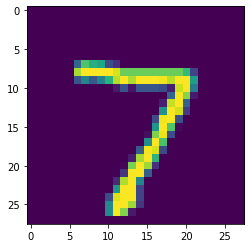

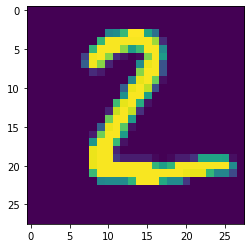

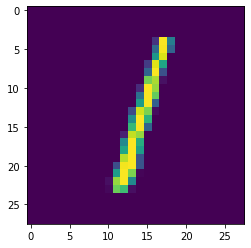

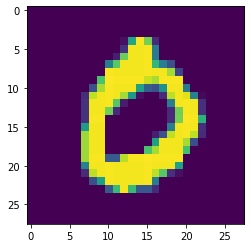

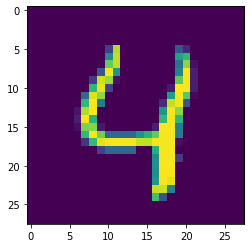

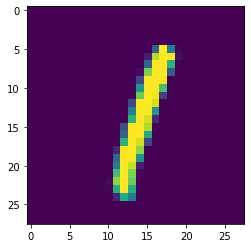

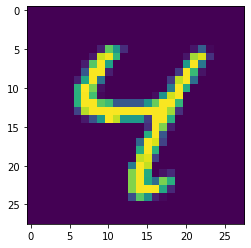

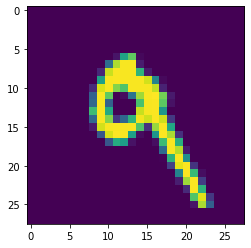

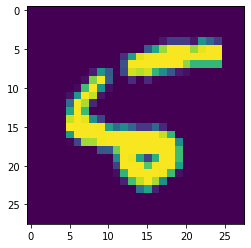

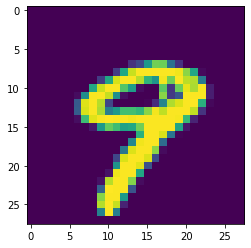

In [ ]:
#plotting the values
for i in range(0,10):
  image=x_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()